In [29]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
from gensim.models import LdaModel
import pandas as pd
import ecopy as ep
import seaborn as sns
from scipy import stats

In [2]:
nTopics = 45

In [3]:
topic_names = [
'Water Quality',
'Sediment Transport',
'Wastewater Treatment',
'Flood Risk & Assessment',
'Hydrogeology',
'Coastal Hydrology', 
'River Flow',
'Wetland & Ecology',
'Runoff Quality',
'Rainfall-Runoff',
'Urban Drainage',
'Systems Hydrology',
'Surface-GW Interactions',
'Irrigation Water Management',
'Drought & Water Scarcity',
'Climate Change Impacts',
'Gauging & Monitoring',
'Forecasting',
'Glaciology',
'Salinity',
'Peatlands Mapping & Monitoring',
'Spatial Variability',
'Land Surface Flux',
'Solute Transport',
'Water Resources Management',
'Numerical Modeling',
'Hydrochemistry',
'Pollutant Removal',
'Groundwater Recharge',
'Uncertainty',
'Land Cover',
'Modeling & Calibration',
'Soil Moisture',
'Water Storage & Budgeting',
'Aquifers & Abstraction',
'Microbiology',
'Streamflow',
'Erosion',
'Dynamic Processes',
'Temporal Variability',
'Spatial Variability of Precipitation',
'Rainfall Intensity & Measurement',
'Watershed Hydrology',
'Hydraulics',
'Quantitative Analysis',
]

In [4]:
# Define colors to associate with each topic
custom_colors = {
 'burlywood': '#DEB887',
 'chocolate': '#D2691E',
 'crimson': '#DC143C',
 'darkgreen': '#006400',
 'darkorange': '#FF8C00',
 'darkslategrey': '#2F4F4F',
 'deepskyblue': '#00BFFF',
 'dimgray': '#696969',
 'firebrick': '#B22222',
 'gold': '#FFD700',
 'goldenrod':'#DAA520',
 'lawngreen':'#7CFC00',
 'rosybrown':'#BC8F8F',
 'mediumslateblue':'#7B68EE',
 'mediumvioletred': '#C71585',
 'orangered': '#FF4500',
 'orchid': '#DA70D6',
 'royalblue': '#4169E1',
 'slateblue': '#6A5ACD',
 'springgreen': '#00FF7F',
 'steelblue': '#4682B4',
 'teal': '#008080',
 'turquoise': '#40E0D0',
 'yellow': '#FFFF00',
 'blueviolet': '#8A2BE2',
 'yellowgreen': '#9ACD32',
 'mistyrose': '#FFE4E1',
 'royalblue': '#4169E1',
 'lavender':  '#E6E6FA',
 'seashell': '#FFF5EE',
 'coral':'#FF7F50',
 'magenta':'#FF00FF',
 'moccasin':'#FFE4B5',
 'navy':'#000080',
 'paleturquoise':'#AFEEEE',
 'aliceblue':'#F0F8FF',
 'azure':'#F0FFFF',
 'khaki':'#F0E68C',
 'lightseagreen':'#20B2AA',
 'linen':'#FAF0E6',
 'palevioletred':'#DB7093',
 'sienna':'#A0522D',
 'mediumspringgreen':'#00FA9A',
 'indianred':'#CD5C5C',
 'tomato': '#FF6347',
 'darkcyan': '#008B8B',
}

# turn into a list
colorlist = []
for i, color in enumerate(custom_colors.values()):
    colorlist.append(tuple(int(color.lstrip('#')[i:i+2], 16) for i in (0, 2, 4)))
    colorlist[i] = (colorlist[i][0] / 256, colorlist[i][1] / 256, colorlist[i][2] / 256)

In [5]:
# Load model
lda_model = LdaModel.load(f'trained_models/trained_lda_model_new_{nTopics}')

In [6]:
# Load topic distributions
topic_distributions = np.load(f'data/topic_distributions_broad_{lda_model.num_topics}.npy')
topic_distributions_wogw = np.load(f'data/topic_distributions_broad_wogw_{lda_model.num_topics}.npy')

In [7]:
# Pull topics
topics = lda_model.show_topics(formatted=False, num_topics=nTopics, num_words=20)

In [8]:
# load raw corpus dataframe
with open('data/raw_corpus_broad.pkl', 'rb') as f:
    corpus_df = pkl.load(f)
with open('data/raw_corpus_broad_wogw.pkl', 'rb') as f:
    corpus_df_wogw = pkl.load(f)

In [9]:
# Pull journals
journals = corpus_df.Journal.unique()
journals

array(['HESS', 'HP', 'HSJ', 'JH', 'JHM', 'WRR', 'AWR', 'HGJ', 'JAWRA',
       'JCH', 'JWRPM', 'WR', 'WRM', 'ESWRT', 'GW', 'ISWCR', 'JHREG',
       'WRI'], dtype=object)

In [10]:
# Pull years
years = np.unique(corpus_df['Year'])
years

array(['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020'], dtype=object)

In [11]:
# Pull papers
papers = np.unique(corpus_df['Title'])
papers.shape


(73644,)

In [12]:
corpus_df

,DOI,Year,Journal,Title,Abstract,Affiliation
0,10.5194/hess-21-6541-2017,2017,HESS,Development and evaluation of a stochastic dai...,The primary objective of this study is to deve...,NaN
1,10.5194/hess-21-6559-2017,2017,HESS,"Evaluation of GPM IMERG Early, Late, and Final...",The Global Precipitation Measurement (GPM) Int...,NaN
2,10.5194/hess-21-6519-2017,2017,HESS,Water movement through plant roots - exact sol...,"In 1978, Landsberg and Fowkes presented a solu...",NaN
3,10.5194/hess-21-6485-2017,2017,HESS,Spatiotemporal response of the water cycle to ...,The hydrological effects of the ``Grain for Gr...,NaN
4,10.5194/hess-21-6501-2017,2017,HESS,Precipitation extremes on multiple timescales ...,"For several hydrological modelling tasks, prec...",NaN
5,10.5194/hess-21-6445-2017,2017,HESS,Monitoring small reservoirs' storage with sate...,"In river basins with water storage facilities,...",NaN
6,10.5194/hess-21-6461-2017,2017,HESS,Does nonstationarity in rainfall require nonst...,"In Canada, risk of flooding due to heavy rainf...",NaN
7,10.5194/hess-21-6425-2017,2017,HESS,Prediction of storm transfers and annual loads...,"Excess nutrients in surface waters, such as ph...",NaN
8,10.5194/hess-21-6363-2017,2017,HESS,Non-destructive estimates of soil carbonic anh...,The contribution of photosynthesis and soil re...,NaN
9,10.5194/hess-21-6401-2017,2017,HESS,Development of a monthly to seasonal forecast ...,"Traditionally, navigation-related forecasts in...",NaN


In [13]:
# H(x) = - sum P(x)log P(x)
def calc_entropy(pmf):
    return -np.nansum(pmf * np.log(pmf)) #code implementation of entropy equation

In [14]:
# topic_distributions = np.where(topic_distributions == 0, 0.000000001, topic_distributions)

In [15]:
topic_distributions.shape

(74479, 45)

/home/mashrekur/anaconda3/lib/python3.7/site-packages/ecopy/diversity/diversity.py:147: RuntimeWarning: invalid value encountered in double_scalars
  return H/np.log(n)


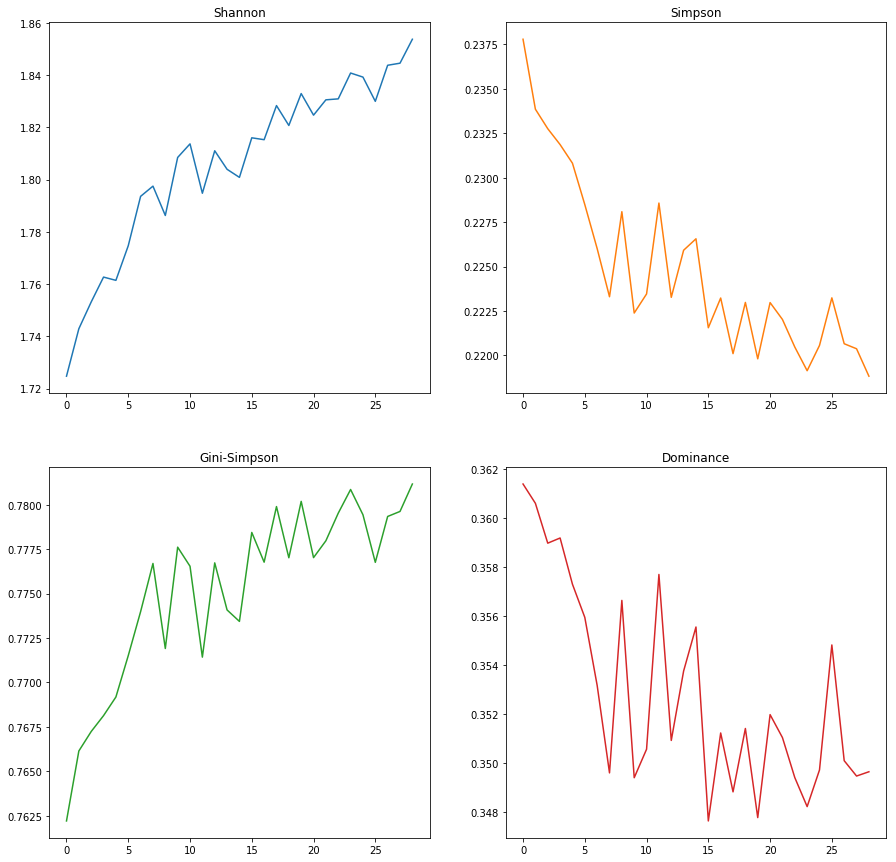

In [16]:
# Diversity of corpus
diversity_metrics = ['shannon', 'simpson', 'gini-simpson', 'dominance', 'even']
# corpus_diversity = pd.DataFrame(index = years, columns = diversity_metrics)

shannon_diversity = {}
simpson_diversity = {}
gini_diversity = {}
dominance = {}
evenness = {}
shannon_diversity_mean = []
simpson_diversity_mean = []
gini_diversity_mean = []
dominance_mean = []
evenness_mean = []
t_test = []


for y, year in enumerate(years):
    topic_distributions_year = topic_distributions[corpus_df['Year'] == year,:]

    shannon_diversity[year] = ep.diversity(topic_distributions_year, method = 'shannon', breakNA=False, num_equiv=False)
    simpson_diversity[year] = ep.diversity(topic_distributions_year, method = 'simpson', breakNA=False, num_equiv=False)
    gini_diversity[year] = ep.diversity(topic_distributions_year, method = 'gini-simpson', breakNA=False, num_equiv=False)
    dominance[year] = ep.diversity(topic_distributions_year, method = 'dominance', breakNA=False, num_equiv=False)
    evenness[year] = ep.diversity(topic_distributions_year, method = 'even', breakNA=False, num_equiv=False)

    shannon_diversity_mean.append(np.mean(shannon_diversity[year]))
    simpson_diversity_mean.append(np.mean(simpson_diversity[year]))
    gini_diversity_mean.append(np.mean(gini_diversity[year]))
    dominance_mean.append(np.mean(dominance[year]))
    evenness_mean.append(np.mean(evenness[year]))
    
#     if y > 0:
# #         print((stats.ttest_ind(shannon_diversity[years[y]],shannon_diversity[years[y-1]])))
#         t_test.append(stats.ttest_ind(shannon_diversity[years[y]],shannon_diversity[years[y-1]]))
# #         print(t_test)

# plt.plot(t_test[:])

# plt.show()
#         print(year, np.median(shannon_diversity[year]), np.mean(shannon_diversity[year]), np.std(shannon_diversity[year]))
        
fig, axs = plt.subplots(2,2,figsize=(15,15))    
axs[0, 0].plot(shannon_diversity_mean[:-1])
axs[0, 0].set_title('Shannon')
axs[0, 1].plot(simpson_diversity_mean[:-1], 'tab:orange')
axs[0, 1].set_title('Simpson')
axs[1, 0].plot(gini_diversity_mean[:-1],'tab:green')
axs[1, 0].set_title('Gini-Simpson')
axs[1, 1].plot(dominance_mean[:-1], 'tab:red')
axs[1, 1].set_title('Dominance')
    
    
plt.savefig('figures/diversity_year_mean.png')    

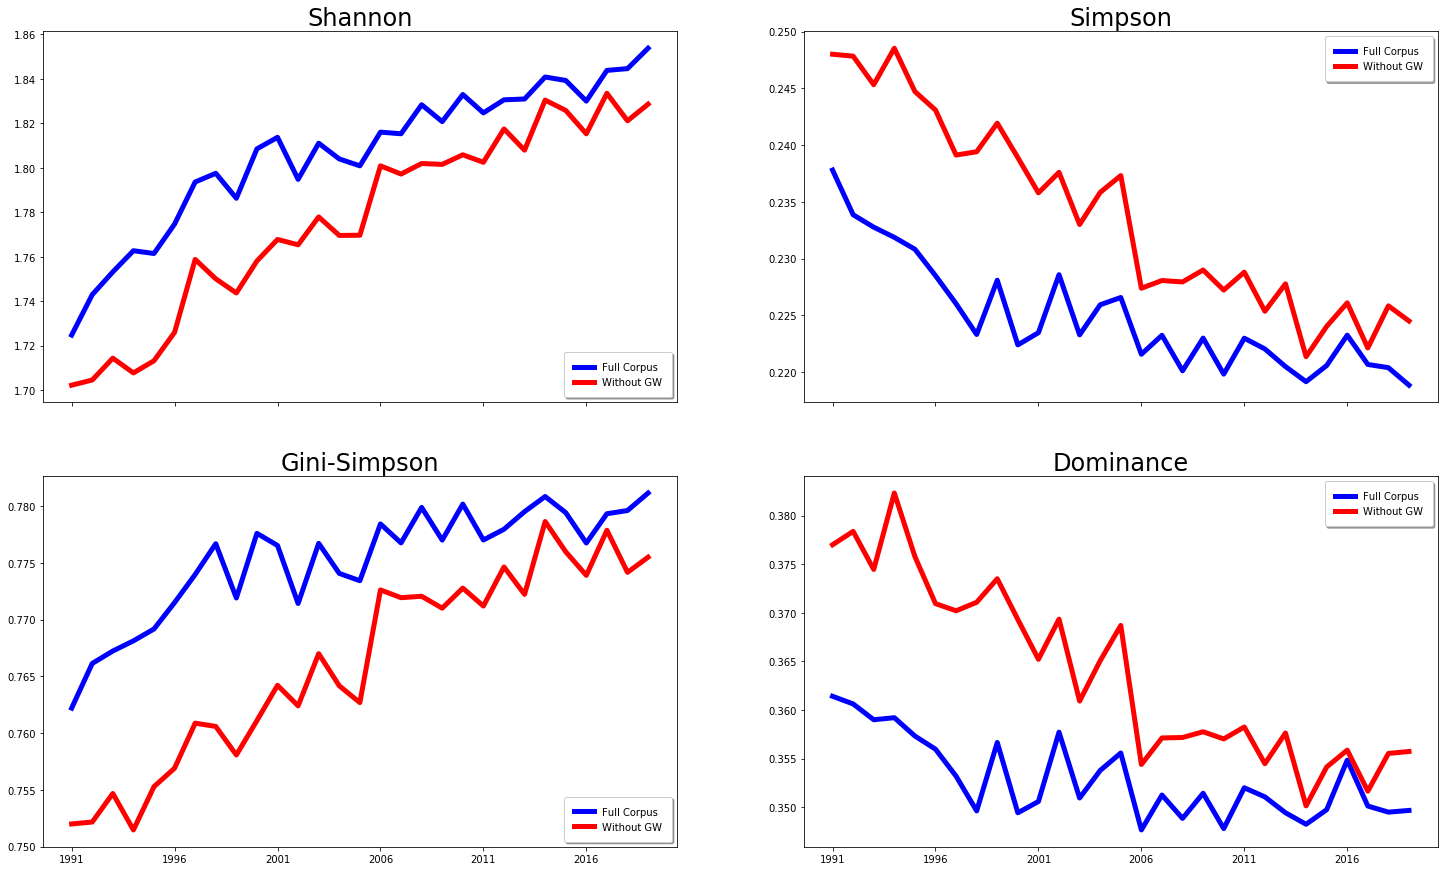

In [17]:
# Diversity of corpus w/o GW
diversity_metrics = ['shannon', 'simpson', 'gini-simpson', 'dominance', 'even']
# corpus_diversity = pd.DataFrame(index = years, columns = diversity_metrics)

shannon_diversity_wogw = {}
simpson_diversity_wogw = {}
gini_diversity_wogw = {}
dominance_wogw = {}
shannon_diversity_mean_wogw = []
simpson_diversity_mean_wogw = []
gini_diversity_mean_wogw = []
dominance_mean_wogw = []
# t_test = []


for y, year in enumerate(years):
    topic_distributions_year = topic_distributions_wogw[corpus_df_wogw['Year'] == year,:]

    shannon_diversity_wogw[year] = ep.diversity(topic_distributions_year, method = 'shannon', breakNA=False, num_equiv=False)
    simpson_diversity_wogw[year] = ep.diversity(topic_distributions_year, method = 'simpson', breakNA=False, num_equiv=False)
    gini_diversity_wogw[year] = ep.diversity(topic_distributions_year, method = 'gini-simpson', breakNA=False, num_equiv=False)
    dominance_wogw[year] = ep.diversity(topic_distributions_year, method = 'dominance', breakNA=False, num_equiv=False)
#     evenness[year] = ep.diversity(topic_distributions_year, method = 'even', breakNA=False, num_equiv=False)

    shannon_diversity_mean_wogw.append(np.mean(shannon_diversity_wogw[year]))
    simpson_diversity_mean_wogw.append(np.mean(simpson_diversity_wogw[year]))
    gini_diversity_mean_wogw.append(np.mean(gini_diversity_wogw[year]))
    dominance_mean_wogw.append(np.mean(dominance_wogw[year]))
#     evenness_mean.append(np.mean(evenness[year]))
    
#     if y > 0:
# #         print((stats.ttest_ind(shannon_diversity[years[y]],shannon_diversity[years[y-1]])))
#         t_test.append(stats.ttest_ind(shannon_diversity[years[y]],shannon_diversity[years[y-1]]))
# #         print(t_test)

# plt.plot(t_test[:])

# plt.show()
# print(year, np.median(shannon_diversity[year]), np.mean(shannon_diversity[year]), np.std(shannon_diversity[year]))
        
fig, ((axs[0, 0],axs[0, 1]),(axs[1, 0],axs[1, 1])) = plt.subplots(2,2,figsize=(25,15),sharex=True,sharey = False)
fig.add_gridspec(1,4)

l1 = axs[0, 0].plot(years[:-1], shannon_diversity_mean[:-1], color = 'blue', label = 'Full Corpus',linewidth = 5)
l2 = axs[0, 0].plot(years[:-1], shannon_diversity_mean_wogw[:-1], color = 'red', label = 'Without GW',linewidth = 5)
l3 = axs[0, 0].set_title('Shannon',size=24)
l4 = axs[0, 1].plot(years[:-1], simpson_diversity_mean[:-1], color = 'blue', label = 'Full Corpus',linewidth = 5)
l5 = axs[0, 1].plot(years[:-1], simpson_diversity_mean_wogw[:-1], color = 'red', label = 'Without GW',linewidth = 5)
l6 = axs[0, 1].set_title('Simpson',size=24)
l7 = axs[1, 0].plot(years[:-1], gini_diversity_mean[:-1], color = 'blue', label = 'Full Corpus',linewidth = 5)
l8 = axs[1, 0].plot(years[:-1], gini_diversity_mean_wogw[:-1], color = 'red', label = 'Without GW',linewidth = 5)
l9 = axs[1, 0].set_title('Gini-Simpson',size=24)
l10 = axs[1, 1].plot(years[:-1], dominance_mean[:-1], color = 'blue', label = 'Full Corpus',linewidth = 5)
l11 = axs[1, 1].plot(years[:-1], dominance_mean_wogw[:-1], color = 'red', label = 'Without GW',linewidth = 5)
l12 = axs[1, 1].set_title('Dominance',size=24)

axs[0,0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[0,1].legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[1,0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[1,1].legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)


plt.xticks(years[0::5])


plt.savefig('figures/diversity_year_mean_wogw.png')



#standard deviations as error bars/uncertainty bounds {done}
#mean diversity and std over whole corpus {done}
# one set of topic distributions per year, take mean of topic dist, yearwise mean diversity of the topic distributions {done}
#bar graphs

In [18]:
#Calculate std deviations of diversity metrics over corpus
shannon_diversity_std = []
simpson_diversity_std = []
gini_diversity_std = []
dominance_std = []

for y, year in enumerate(years):
    topic_distributions_year = topic_distributions[corpus_df['Year'] == year,:]

    shannon_diversity[year] = ep.diversity(topic_distributions_year, method = 'shannon', breakNA=False, num_equiv=False)
    simpson_diversity[year] = ep.diversity(topic_distributions_year, method = 'simpson', breakNA=False, num_equiv=False)
    gini_diversity[year] = ep.diversity(topic_distributions_year, method = 'gini-simpson', breakNA=False, num_equiv=False)
    dominance[year] = ep.diversity(topic_distributions_year, method = 'dominance', breakNA=False, num_equiv=False)
    evenness[year] = ep.diversity(topic_distributions_year, method = 'even', breakNA=False, num_equiv=False)

    shannon_diversity_std.append(np.std(shannon_diversity[year]))
    simpson_diversity_std.append(np.std(simpson_diversity[year]))
    gini_diversity_std.append(np.std(gini_diversity[year]))
    dominance_std.append(np.std(dominance[year]))


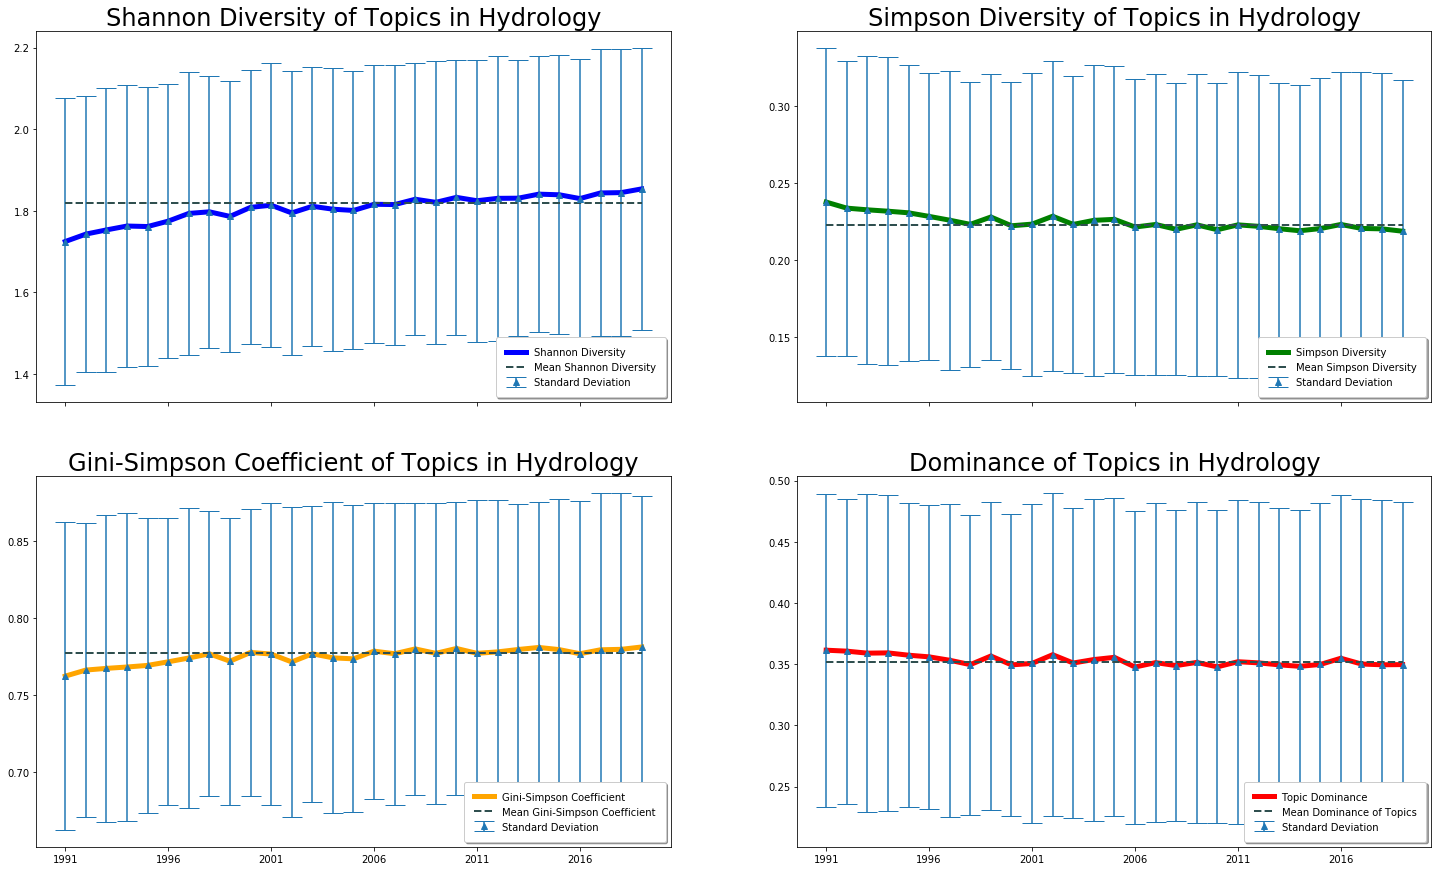

In [37]:
#mean diversity and standard deviations over entire corpus

mean_shannon_corpus = np.mean(ep.diversity(topic_distributions, method = 'shannon', breakNA=False, num_equiv=False))
mean_simpson_corpus = np.mean(ep.diversity(topic_distributions, method = 'simpson', breakNA=False, num_equiv=False))
mean_gini_corpus = np.mean(ep.diversity(topic_distributions, method = 'gini-simpson', breakNA=False, num_equiv=False))
mean_dominance_corpus = np.mean(ep.diversity(topic_distributions, method = 'dominance', breakNA=False, num_equiv=False))

plot_mean_shannon_corpus = np.full(len(years),mean_shannon_corpus)
plot_mean_simpson_corpus = np.full(len(years),mean_simpson_corpus)
plot_mean_gini_corpus = np.full(len(years),mean_gini_corpus)
plot_mean_dominance_corpus = np.full(len(years),mean_dominance_corpus)

    
fig, ((axs[0, 0],axs[0, 1]),(axs[1, 0],axs[1, 1])) = plt.subplots(2,2,figsize=(25,15),sharex=True,sharey = False)
fig.add_gridspec(1,4)

axs[0, 0].plot(years[:-1], shannon_diversity_mean[:-1], color = 'blue', label = 'Shannon Diversity',linewidth = 5)
axs[0, 0].plot(years[:-1],plot_mean_shannon_corpus[:-1],'k--', color = 'darkslategrey', label = 'Mean Shannon Diversity',linewidth = 2)
axs[0, 0].errorbar(years[:-1],shannon_diversity_mean[:-1],shannon_diversity_std[:-1],marker ='^',fmt='o', label = 'Standard Deviation',capsize=10)
axs[0, 0].set_title('Shannon Diversity of Topics in Hydrology',size=24)

axs[0, 1].plot(years[:-1], simpson_diversity_mean[:-1], color = 'green', label = 'Simpson Diversity',linewidth = 5)
axs[0, 1].plot(years[:-1],plot_mean_simpson_corpus[:-1],'k--', color = 'darkslategrey', label = 'Mean Simpson Diversity',linewidth = 2)
axs[0, 1].errorbar(years[:-1],simpson_diversity_mean[:-1],simpson_diversity_std[:-1],marker ='^',fmt='o', label = 'Standard Deviation',capsize=10)
axs[0, 1].set_title('Simpson Diversity of Topics in Hydrology',size=24)

axs[1, 0].plot(years[:-1], gini_diversity_mean[:-1], color = 'orange', label = 'Gini-Simpson Coefficient',linewidth = 5)
axs[1, 0].plot(years[:-1],plot_mean_gini_corpus[:-1],'k--', color = 'darkslategrey', label = 'Mean Gini-Simpson Coefficient',linewidth = 2)
axs[1, 0].errorbar(years[:-1],gini_diversity_mean[:-1],gini_diversity_std[:-1],marker ='^',fmt='o', label = 'Standard Deviation',capsize=10)
axs[1, 0].set_title('Gini-Simpson Coefficient of Topics in Hydrology',size=24)

axs[1, 1].plot(years[:-1], dominance_mean[:-1], color = 'red', label = 'Topic Dominance',linewidth = 5)
axs[1, 1].plot(years[:-1],plot_mean_dominance_corpus[:-1],'k--', color = 'darkslategrey', label = 'Mean Dominance of Topics',linewidth = 2)
axs[1, 1].errorbar(years[:-1],dominance_mean[:-1],dominance_std[:-1],marker ='^',fmt='o', label = 'Standard Deviation',capsize=10)
axs[1, 1].set_title('Dominance of Topics in Hydrology',size=24)

axs[0,0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[0,1].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[1,0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[1,1].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.xticks(years[0::5])

plt.savefig('figures/diversity_year_full_mean_std.png')

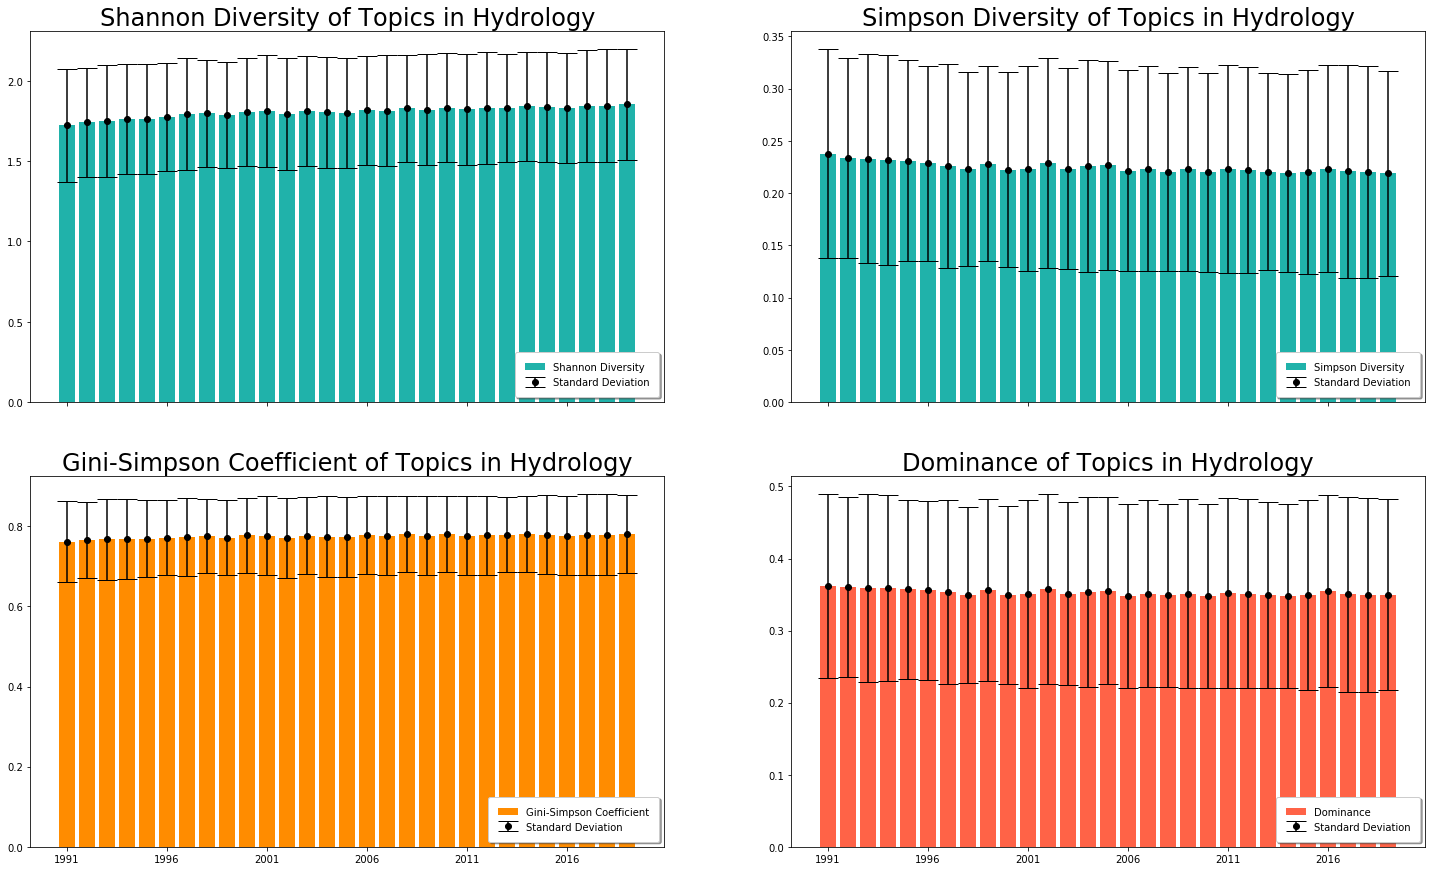

In [45]:
#plotting bar graphs
fig, ((axs[0, 0],axs[0, 1]),(axs[1, 0],axs[1, 1])) = plt.subplots(2,2,figsize=(25,15),sharex=True,sharey = False)
fig.add_gridspec(1,4)

axs[0, 0].bar(years[:-1], shannon_diversity_mean[:-1], color = 'lightseagreen', label = 'Shannon Diversity', linewidth = 5)
axs[0, 0].errorbar(years[:-1],shannon_diversity_mean[:-1],shannon_diversity_std[:-1],color='black',marker ='o',fmt='o', label = 'Standard Deviation',capsize=10)
axs[0, 0].set_title('Shannon Diversity of Topics in Hydrology',size=24)

axs[0, 1].bar(years[:-1], simpson_diversity_mean[:-1], color = 'lightseagreen', label = 'Simpson Diversity', linewidth = 5)
axs[0, 1].errorbar(years[:-1],simpson_diversity_mean[:-1],simpson_diversity_std[:-1],color='black',marker ='o',fmt='o', label = 'Standard Deviation',capsize=10)
axs[0, 1].set_title('Simpson Diversity of Topics in Hydrology',size=24)

axs[1, 0].bar(years[:-1], gini_diversity_mean[:-1], color = 'darkorange', label = 'Gini-Simpson Coefficient', linewidth = 5)
axs[1, 0].errorbar(years[:-1],gini_diversity_mean[:-1],gini_diversity_std[:-1],color='black',marker ='o',fmt='o', label = 'Standard Deviation',capsize=10)
axs[1, 0].set_title('Gini-Simpson Coefficient of Topics in Hydrology',size=24)

axs[1, 1].bar(years[:-1], dominance_mean[:-1], color = 'tomato', label = 'Dominance', linewidth = 5)
axs[1, 1].errorbar(years[:-1],dominance_mean[:-1], dominance_std[:-1],color='black',marker ='o',fmt='o', label = 'Standard Deviation',capsize=10)
axs[1, 1].set_title('Dominance of Topics in Hydrology',size=24)

axs[0,0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[0,1].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[1,0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[1,1].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.xticks(years[0::5])

plt.savefig('figures/diversity_bar_chart.png')


In [21]:
# # 
# diversity_metrics = ['shannon', 'simpson', 'gini-simpson', 'dominance', 'even']
# corpus_diversity = pd.DataFrame(index = years, columns = diversity_metrics)

# res = {} 
# topic_popularity = []

# for y, year in enumerate(years):
# #     topic_distributions_year = topic_distributions[corpus_df['Year'] == year,:]
# #     topic_popularity.append(np.sum(topic_distributions_year, axis=0) / np.sum(topic_distributions_year))
# #     for metric in diversity_metrics:
# #         corpus_diversity.loc[year,metric] = ep.diversity(topic_distributions, method = 'shannon', breakNA=False, num_equiv=True)
#      res[year] = ep.diversity(topic_distributions, method = 'simpson', breakNA=False, num_equiv=True)
#      plt.hist(res, bins =100)
#      plt.show()
# #      if y > 0:
# print(stats.ttest_ind(res[years[y]],res[years[y-1]]))
# print(year, np.median(res[year]), np.mean(res[year]), np.std(res[year]))

In [22]:
# [np.expand_dims(pop, axis = -1) for pop in topic_popularity]
# var = np.concatenate([np.expand_dims(pop, axis = -1) for pop in topic_popularity], axis = 1).transpose()
# # len(topic_popularity)

In [23]:
# arr = ep.diversity(var,method = 'shannon', breakNA=False, num_equiv=False) 
# plt.plot(arr[:-1])
# plt.show()
# plt.plot(shannon_diversity_mean[:-1])
#res_std,res_median
#plot error bar for the per paper plot